
# ANALISI DATI – NETFLIX
***Autore:*** Enrico Tortomasi
---

---
**INTRODUZIONE NETFLIX:**

Netflix è un servizio di streaming online che offre un vasto catalogo di film, serie TV, documentari e altri contenuti on-demand, accessibili tramite abbonamento. Gli utenti possono guardare i contenuti su diversi dispositivi connessi a Internet, come smart TV, computer, smartphone e tablet.


## Obiettivo:

Il nostro obiettivo principale per questa analisi sarà quello di meglio definire com'è composto il catalogo, cercando di rispondere a delle domande chiavi per comprendere meglio la struttura interna del dataframe e come i vari contenuti sono distribuiti negli ultimi anni e nelle varie regioni di interesse.


- QUAL'E' L'ANDAMENTO DEI CONTENUTI FRA FILM E SERIE TV NEGLI ULTIMI ANNI?

- QUALI SONO LE CATEGORIE PIU' PREDOMINANTI NEL CATALOGO NETFLIX NEGLI ULTIMI 5 ANNI?

- QUALI SONO LE REGIONI CON MAGGIORI CONTENUTI E COME SONO DISTRIBUITI FRA SERIE TV E FILMS?

- GRAFICO A TORTA DEI RATING DEI CONTENUTI NEL CATALOGO



---
## 🔹 1. Caricamento e Ispezione Dati
- Carica dataset
- Mostra prime righe
- Controlla info, tipi colonne, valori nulli


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from collections import Counter

sns.set_style("whitegrid")

# Caricamento dataset
df = pd.read_csv("../data/netflix_titles.csv")

In [2]:
#Visualizzo i dati
df.head(100)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
95,s96,TV Show,The Circle,NaN,Michelle Buteau,"United States, United Kingdom","September 8, 2021",2021,TV-MA,3 Seasons,Reality TV,Status and strategy collide in this social exp...
96,s97,Movie,If I Leave Here Tomorrow: A Film About Lynyrd ...,Stephen Kijak,"Ronnie Van Zandt, Gary Rossington, Allen Colli...",United States,"September 7, 2021",2018,TV-MA,97 min,"Documentaries, Music & Musicals","Using interviews and archival footage, this do..."
97,s98,TV Show,Kid Cosmic,NaN,"Jack Fisher, Tom Kenny, Amanda C. Miller, Kim ...",United States,"September 7, 2021",2021,TV-Y7,2 Seasons,"Kids' TV, TV Comedies, TV Sci-Fi & Fantasy",A boy's superhero dreams come true when he fin...
98,s99,TV Show,Octonauts: Above & Beyond,NaN,"Antonio Aakeel, Chipo Chung, Simon Foster, Ter...",United Kingdom,"September 7, 2021",2021,TV-Y,1 Season,"British TV Shows, Kids' TV",The Octonauts expand their exploration beyond ...


In [3]:
#Controllo la struttura del df
df.shape

(8807, 12)

In [4]:
#Controllo le tipologie delle colonne
df.dtypes
#date_added di tipo errato, va convertito in datetime

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [5]:
#Controllo la presenza di valori nulli
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
#Controllo i valori della colonna rating, i valori 74 min,84 min e 66 min sono errati, inoltre NR può essere gestito meglio.
df.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

---
## 🔹 2. Pulizia Dati
- Rimuovi duplicati e colonne irrilevanti
- Gestisci valori mancanti
- Crea nuove colonne utili
- Documenta ogni scelta


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
#Droppo le colonne che non mi servono per le analisi:
#Description,duration,cast,director

columns_drop = ['description','duration','cast','director']

df.drop(columns = columns_drop, inplace=True)

In [9]:
#Correggo il formato di date_added in date_time
df['date_added'] = pd.to_datetime(df['date_added'], format = '%B %d, %Y', errors='coerce' )

In [10]:
#Riempio le righe nulle
df['country'] = df['country'].fillna(value='Country not specified')
df['rating'] = df['rating'].fillna(value='Rating not specified')

In [11]:
#Cambio i valori NR in rating con 'Rating not specified' per uniformare
df.rating = df.rating.replace('NR','Rating not specified')

In [12]:
#Droppo le colonne con i valori errati in rating
valori_errati_rating = ['74 min', '84 min', '66 min']
df = df[~df.rating.isin(valori_errati_rating)]

In [13]:
#Controllo se presenti eventuali duplicati
df.duplicated().sum()

np.int64(0)

In [14]:
#Non è presente più nessun valore nullo,tranne i datetime che va bene mantenerli.
df.isnull().sum()

show_id          0
type             0
title            0
country          0
date_added      98
release_year     0
rating           0
listed_in        0
dtype: int64

In [15]:
#Controllo che release_year sia coerente con date_added
incoerenti = df[(df['date_added'].notna()) & (df.date_added.dt.year < df.release_year)]
len(incoerenti)
incoerenti.head()

,show_id,type,title,country,date_added,release_year,rating,listed_in
1551,s1552,TV Show,Hilda,"United Kingdom, Canada, United States",2020-12-14,2021,TV-Y7,Kids' TV
1696,s1697,TV Show,Polly Pocket,"Canada, United States, Ireland",2020-11-15,2021,TV-Y,Kids' TV
2920,s2921,TV Show,Love Is Blind,United States,2020-02-13,2021,TV-MA,"Reality TV, Romantic TV Shows"
3168,s3169,TV Show,Fuller House,United States,2019-12-06,2020,TV-PG,TV Comedies
3287,s3288,TV Show,Maradona in Mexico,"Argentina, United States, Mexico",2019-11-13,2020,TV-MA,"Docuseries, Spanish-Language TV Shows"


In [16]:
#Sono solo 5 le righe incoerenti quindi preferisco eliminarle
incoerenti_da_rimuovere = (df['date_added'].notna()) & (df.date_added.dt.year < df['release_year'])
df = df[~incoerenti_da_rimuovere]

In [17]:
#Controllo che type contenga solo valori previsti('Movie','TV Show')
incoerenti_type = df[(df.type != 'Movie') & (df.type != 'TV Show')]
len(incoerenti_type)
#Non ci sono incoerenti per type

0

---
## 🔹 3. Analisi Esplorativa (EDA)
- Statistiche descrittive
- Distribuzioni
- Relazioni tra variabili
- Insight testuali sotto ogni output


**PRIMA DOMANDA:** 

- QUAL'E' L'ANDAMENTO DEI CONTENUTI FRA FILM E SERIE TV NEGLI ULTIMI ANNI?

In [18]:
#Raggruppo le tipologie di contenuti per data di inserimento nel catalogo, estrapolando l'anno dalla data, poi faccio un conteggio.
andamento_contenuti = df.groupby(df['date_added'].dt.year)['type'].value_counts(ascending=False).unstack()
andamento_contenuti

type,Movie,TV Show
date_added,,
2008.0,1.0,1.0
2009.0,2.0,NaN
2010.0,1.0,NaN
2011.0,13.0,NaN
2012.0,3.0,NaN
2013.0,6.0,3.0
2014.0,19.0,4.0
2015.0,56.0,17.0
2016.0,251.0,163.0


**ANALISI:**

Dai dati emerge che negli ultimi anni c'è stato un aumento progressivo nel catalogo **Netflix**, Inoltre è da notare come vi è un maggior volume di film rispetto alle Serie TV, che tutta via sono diminuiti leggermente negli ultimi anni rispetto alle Serie TV, queste invece hanno continuato ad aumentare, indice probabilmente di una maggiore richiesta da parte del pubblico per quest'ultime.

**CONCLUSIONI:**

Nei prossimi anni Netflix potrebbe puntare ancora di più sulle serie TV per rispondere alla domanda crescente.

---

**SECONDA DOMANDA:** 

- QUALI SONO LE CATEGORIE PIU' PREDOMINANTI NEL CATALOGO NETFLIX NEGLI ULTIMI 5 ANNI?

In [19]:
df.head()

,show_id,type,title,country,date_added,release_year,rating,listed_in
0,s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,Documentaries
1,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Country not specified,2021-09-24,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,Country not specified,2021-09-24,2021,TV-MA,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,India,2021-09-24,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ..."


In [20]:
#Copio il dataframe in un df temporaneo e lo esplodo
df_exploded = df.assign(listed_in=df['listed_in'].str.split(',')).explode('listed_in')
#Rimuovo evenutali spazi
df_exploded['listed_in'] = df_exploded['listed_in'].str.strip()

In [21]:
#Creo un dataframe con le 5 maggiori categorie per anno
conteggio_categorie = (
    df_exploded.groupby(df.date_added.dt.year)['listed_in']
    .value_counts()
    .groupby(level=0,group_keys=False)
    .nlargest(5)
    .reset_index(name='conteggio')
)
#Porto gli anni in int
conteggio_categorie.date_added = conteggio_categorie.date_added.astype(int)
#Filtro solo gli ultimi 5 anni del df
conteggio_categorie = conteggio_categorie.query('date_added >= 2017')

In [22]:
#Visualizzo i risultati
conteggio_categorie

,date_added,listed_in,conteggio
37,2017,International Movies,395
38,2017,Dramas,293
39,2017,Documentaries,206
40,2017,International TV Shows,196
41,2017,Comedies,177
42,2018,International Movies,668
43,2018,Dramas,531
44,2018,Comedies,297
45,2018,International TV Shows,208
46,2018,Action & Adventure,172


**ANALISI:**

- Alcune categorie, come **Dramma, Commedia** e **Documentario**, sono costantemente tra le più presenti ogni anno, segno di una domanda stabile da parte degli utenti.

- Si osserva una certa variazione nelle categorie minori: alcune categorie entrano ed escono dalla top 5 a seconda delle tendenze del periodo (ad esempio, **“International Movies” o “Children & Family Movies”** possono essere più o meno presenti in base alle strategie di catalogo di Netflix).

- Il conteggio delle categorie principali tende a rimanere elevato, indicando che Netflix continua a investire soprattutto nei generi più popolari.

- Alcuni anni mostrano una maggiore diversificazione delle categorie, probabilmente per rispondere a nuove esigenze di mercato o a fenomeni culturali emergenti.

**CONCLUSIONI:**

- **Netflix mantiene una forte presenza nei generi tradizionali (Dramma, Commedia, Documentario)**, che rappresentano una base solida del suo catalogo.

- La variazione delle categorie minori suggerisce che **la piattaforma è attenta alle tendenze e aggiorna il catalogo per seguire i gusti del pubblico**.

- La presenza costante di alcune categorie indica che gli utenti continuano a preferire determinati generi, mentre **la rotazione di altre categorie mostra la capacità di Netflix di sperimentare e adattarsi**.



---

**TERZA DOMANDA:**

- QUALI SONO LE REGIONI CON MAGGIORI CONTENUTI E COME SONO DISTRIBUITI FRA SERIE TV E FILMS?

In [23]:
df.head()

,show_id,type,title,country,date_added,release_year,rating,listed_in
0,s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,Documentaries
1,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Country not specified,2021-09-24,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,Country not specified,2021-09-24,2021,TV-MA,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,India,2021-09-24,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ..."


In [24]:
country_df = df.assign(country = df['country'].str.split(',')).explode('country')
country_df['country'] = country_df['country'].str.strip()

In [25]:
country_df

,show_id,type,title,country,date_added,release_year,rating,listed_in
0,s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,Documentaries
1,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Country not specified,2021-09-24,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,Country not specified,2021-09-24,2021,TV-MA,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,India,2021-09-24,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,United States,2019-11-20,2007,R,"Cult Movies, Dramas, Thrillers"
8803,s8804,TV Show,Zombie Dumb,Country not specified,2019-07-01,2018,TV-Y7,"Kids' TV, Korean TV Shows, TV Comedies"
8804,s8805,Movie,Zombieland,United States,2019-11-01,2009,R,"Comedies, Horror Movies"
8805,s8806,Movie,Zoom,United States,2020-01-11,2006,PG,"Children & Family Movies, Comedies"


In [40]:
#Ordino le regioni in base ai maggiori contenuti di Movies per regione
conteggio_country_movies = (
    country_df.groupby('country')['type']
    .value_counts().unstack(fill_value=0)
    .sort_values('Movie', ascending=False)
    .head(15)
    .reset_index()
    )
#Rimuovo i dati per 'Country not specified' dal df
conteggio_country_movies = conteggio_country_movies.query('country != "Country not specified"')

#Rimuovo la colonna TV Show
conteggio_country_movies = conteggio_country_movies.drop(columns='TV Show')
conteggio_country_movies

type,country,Movie
0,United States,2748
1,India,962
2,United Kingdom,534
4,Canada,319
5,France,303
6,Germany,182
7,Spain,171
8,Japan,119
9,China,114
10,Mexico,111


In [39]:
#Ordino le regioni in base ai maggior contenuti di TV Shows per regione
conteggio_country_tvshow = (
    country_df.groupby('country')['type']
    .value_counts().unstack(fill_value=0)
    .sort_values('TV Show',ascending=False)
    .head(15)
    .reset_index()
)
#Rimuovo i dati per 'Country not specified' dal df
conteggio_country_tvshow = conteggio_country_tvshow.query('country != "Country not specified"')

#Rimuovo la colonna Movie
conteggio_country_tvshow = conteggio_country_tvshow.drop(columns='Movie')
conteggio_country_tvshow

type,country,TV Show
0,United States,928
2,United Kingdom,271
3,Japan,198
4,South Korea,170
5,Canada,123
6,France,89
7,India,84
8,Taiwan,70
9,Australia,66
10,Spain,61


**ANALISI:**
- Gli **Stati Uniti** sono nettamente il paese con il maggior numero di contenuti sia per i film che per le serie TV, confermando il ruolo centrale dell’industria cinematografica e televisiva americana nel catalogo Netflix.

- Alcuni paesi, come la Francia e la Corea del Sud, hanno una presenza significativa soprattutto nei film, mentre altri (come il Giappone) sono ben rappresentati in entrambe le categorie.

- I paesi non anglofoni (come Spagna, Turchia, Brasile) sono ben presenti nella top 15, segno di una **crescente internazionalizzazione del catalogo Netflix**.



**CONCLUSIONI:**
- Il catalogo Netflix è **fortemente sbilanciato verso i paesi con una grande industria dell’intrattenimento**, ma sta diventando sempre più globale, includendo produzioni di molte regioni diverse.

- La presenza di molti paesi nella top 15 sia per film che per serie TV indica che **Netflix investe in contenuti locali per attrarre pubblici diversi**.

---

**QUARTA DOMANDA:**

- GRAFICO A TORTA DEI RATING DEI CONTENUTI NEL CATALOGO

In [ ]:
#Estrapolo i dati per i rating filtrando i Movie
grafico_rating_movie = df.query('type == "Movie"')
grafico_rating_movie_fin = grafico_rating_movie.rating.value_counts()
grafico_rating_movie_fin

rating
TV-MA                   2060
TV-14                   1427
R                        797
TV-PG                    540
PG-13                    490
PG                       287
TV-Y7                    139
TV-Y                     131
TV-G                     126
Rating not specified      77
G                         41
TV-Y7-FV                   5
NC-17                      3
UR                         3
Name: count, dtype: int64

In [129]:
#Estrapolo i dati per i rating filtrando le TV Series
grafico_rating_serietv = df.query('type == "TV Show"')
grafico_rating_serietv_fin = grafico_rating_serietv.rating.value_counts()
grafico_rating_serietv_fin

rating
TV-MA                   1137
TV-14                    732
TV-PG                    322
TV-Y7                    194
TV-Y                     175
TV-G                      94
Rating not specified       7
R                          2
TV-Y7-FV                   1
Name: count, dtype: int64

**ANALISI:**

Dall’analisi della distribuzione dei rating emerge che la maggior parte dei film e delle serie TV su Netflix è rivolta a un pubblico generico o familiare, con una netta prevalenza di rating come **“TV-MA”, “TV-14” e “TV-PG”**.
Confrontando Film e serie TV, si osserva che le Serie TV hanno una percentuale leggermente più alta di contenuti per un pubblico adulto **(“TV-MA”)**, mentre i film sono più distribuiti tra le varie fasce di rating.

**CONCLUSIONI:**

Il catalogo Netflix è principalmente orientato verso un pubblico adolescente e adulto, ma offre anche una buona varietà di contenuti per famiglie e bambini.
Netflix potrebbe valutare di ampliare ulteriormente l’offerta per fasce di età meno rappresentate.


---
## 🔹 4. Visualizzazioni
- Grafici bar/line/boxplot per trend
- Heatmap per correlazioni
- Etichette e titoli chiari

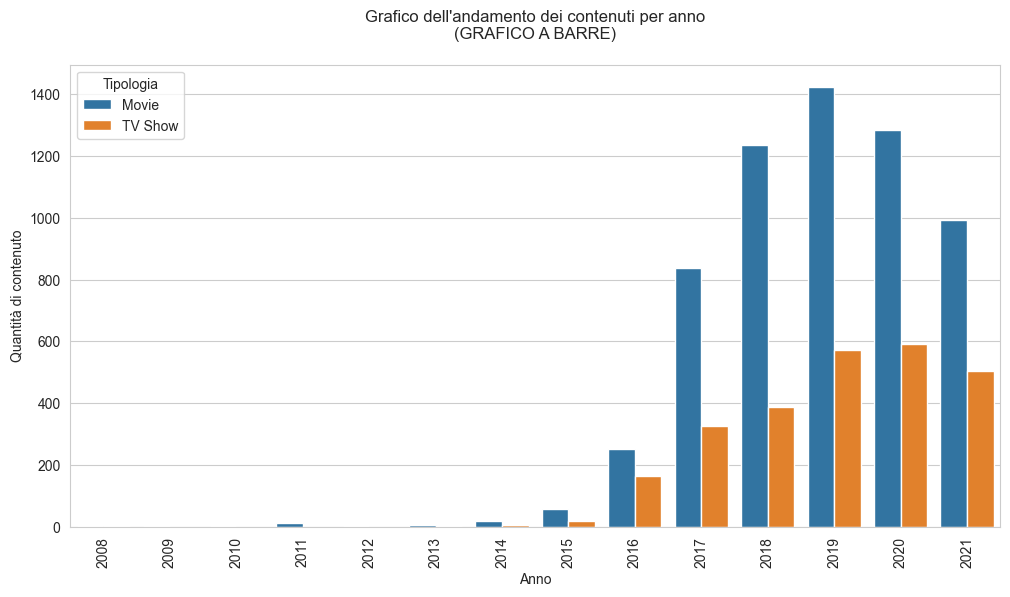

In [ ]:
# GRAFICO ANDAMENTO CONTENUTI NEGLI ANNI
andamento_contenuti_reset = andamento_contenuti.reset_index().melt(id_vars ='date_added' , var_name='type', value_name='conteggio')
andamento_contenuti_reset.date_added = andamento_contenuti_reset.date_added.astype(int)
                                                                                
plt.figure(figsize=(12,6))
sns.barplot(data = andamento_contenuti_reset, x='date_added', y='conteggio', hue='type')
plt.xticks(rotation=90)
plt.title("Grafico dell'andamento dei contenuti per anno\n(GRAFICO A BARRE)\n")
plt.xlabel('Anno')
plt.ylabel('Quantità di contenuto')
plt.legend(title='Tipologia')
plt.show()

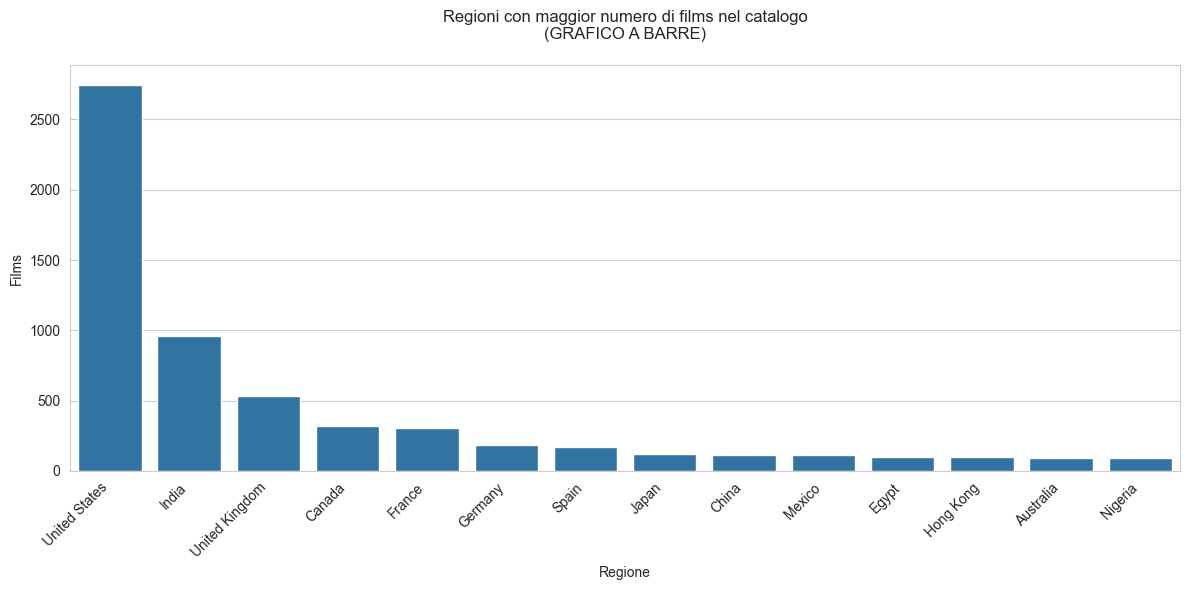

In [48]:
#GRAFICO A BARRE DELLE REGIONI CON MAGGIORI FILMS
plt.figure(figsize=(12,6))
sns.barplot(data=conteggio_country_movies, x='country', y='Movie')
plt.xlabel('Regione')
plt.ylabel('Films')
plt.title('Regioni con maggior numero di films nel catalogo\n(GRAFICO A BARRE)\n')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

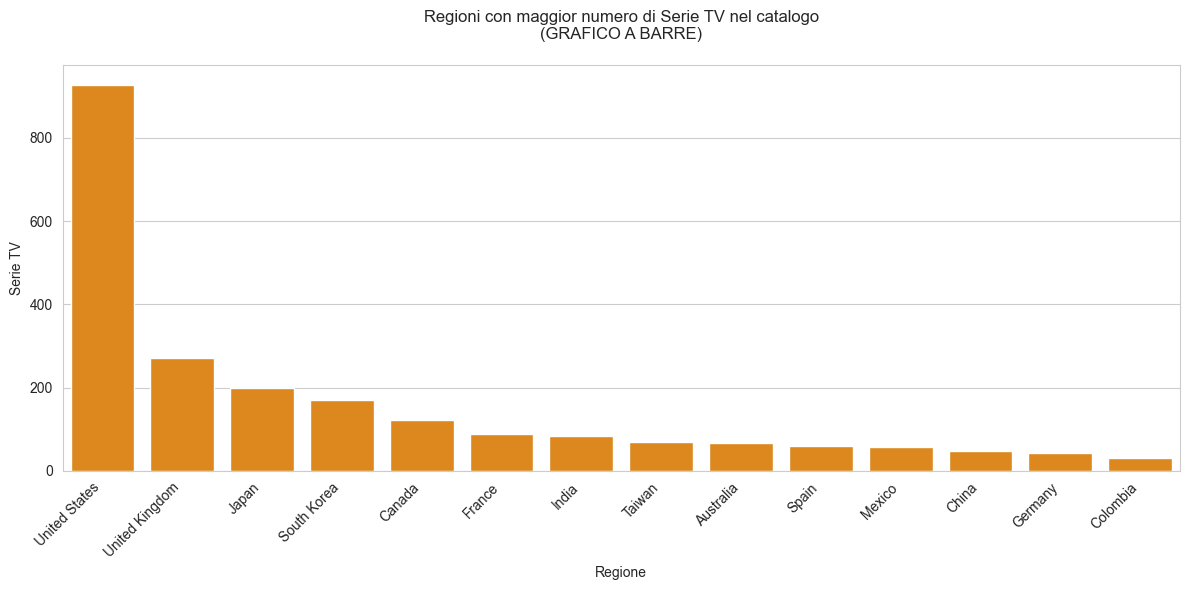

In [53]:
#GRAFICO A BARRE DELLE REGIONI CON MAGGIORI SERIE TV
plt.figure(figsize=(12,6))
# Uso un arancione più scuro per uniformità con il grafico comparativo
sns.barplot(data=conteggio_country_tvshow, x='country', y='TV Show', color='#FB8C00')
plt.xlabel('Regione')
plt.ylabel('Serie TV')
plt.title('Regioni con maggior numero di Serie TV nel catalogo\n(GRAFICO A BARRE)\n')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

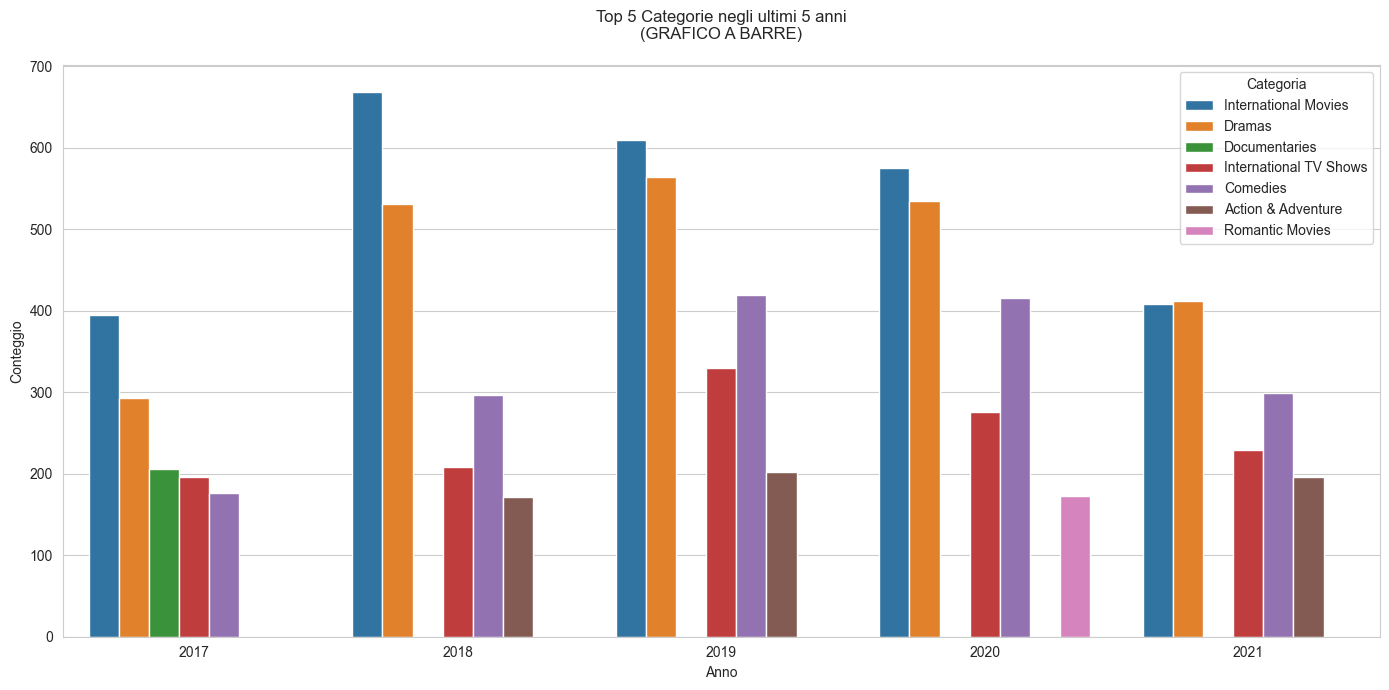

In [218]:
#GRAFICO A BARRE DELLE CATEGORIE CON PIU' RILEVANZA NEGLI ULTIMI 5 ANNI
plt.figure(figsize=(14,7))
sns.barplot(data=conteggio_categorie,x='date_added',y='conteggio', hue='listed_in')
plt.title('Top 5 Categorie negli ultimi 5 anni\n(GRAFICO A BARRE)\n')
plt.xlabel('Anno')
plt.ylabel('Conteggio')
plt.legend(title='Categoria')
plt.tight_layout()
plt.show()

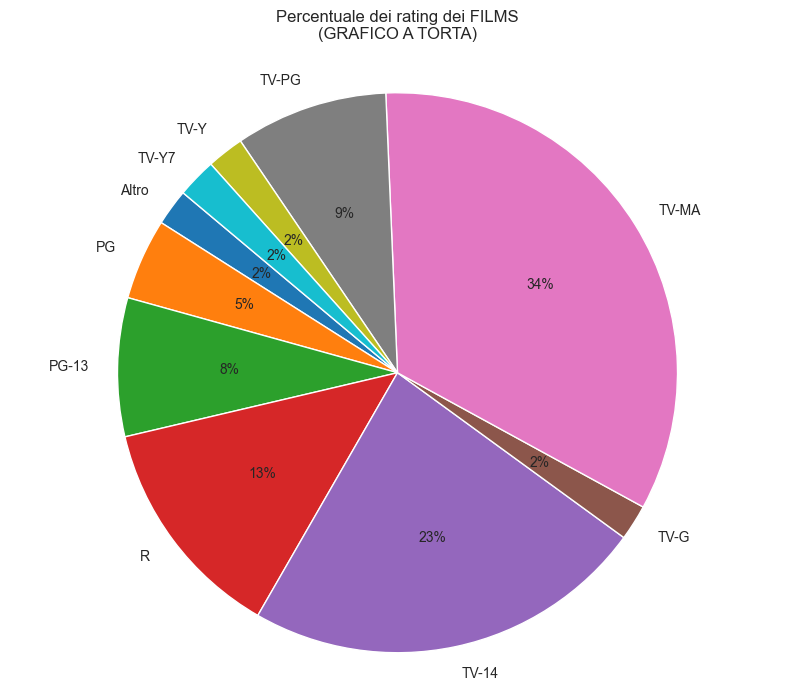

In [ ]:
# GRAFICO A TORTA DEI RATING DEI FILMS
# Filtro i primi 9 valori più significativi e metto il resto su 'Altro' per maggiore chiarezza nel grafico
top_n = 9
top_labels = grafico_rating_movie_fin.nlargest(top_n).index
labels_mod = [label if label in top_labels else 'Altro' for label in grafico_rating_movie_fin.index]
sizes_mod = grafico_rating_movie_fin.groupby(labels_mod).sum()
plt.figure(figsize=(10,8))
plt.pie(sizes_mod, labels = sizes_mod.index, autopct='%1.f%%',startangle=140)
plt.axis('equal')
plt.title('Percentuale dei rating dei FILMS\n(GRAFICO A TORTA)\n')
plt.show()

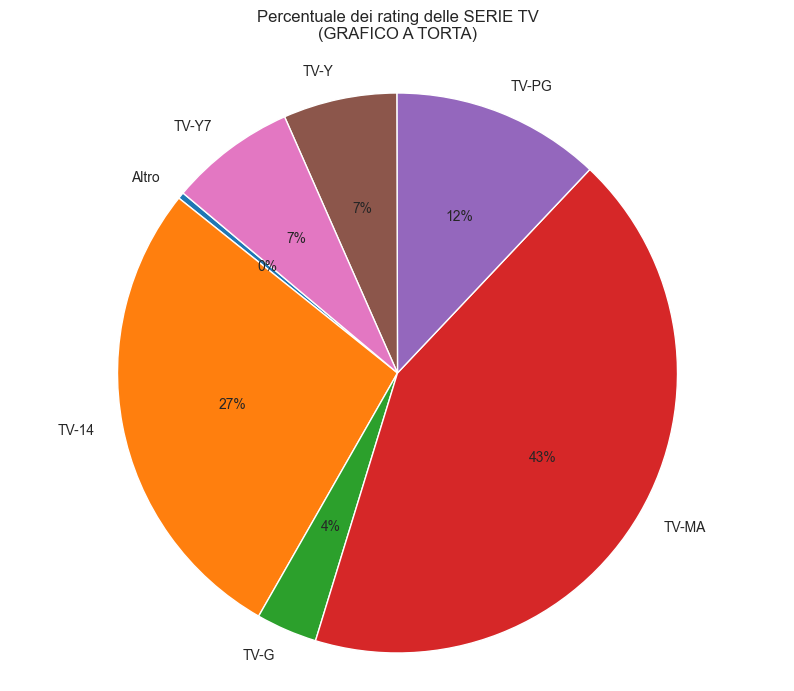

In [ ]:
# GRAFICO A TORTA DEI RATING DELLE SERIE TV
# Filtro i primi 6 valori più significativi e metto il resto su 'Altro' per maggiore chiarezza nel grafico
top_n = 6
top_labels = grafico_rating_serietv_fin.nlargest(top_n).index
labels_mod = [label if label in top_labels else 'Altro' for label in grafico_rating_serietv_fin.index]
sizes_mod = grafico_rating_serietv_fin.groupby(labels_mod).sum()
plt.figure(figsize=(10,8))
plt.pie(sizes_mod, labels = sizes_mod.index, autopct='%1.f%%',startangle=140)
plt.axis('equal')
plt.title('Percentuale dei rating delle SERIE TV\n(GRAFICO A TORTA)\n')
plt.show()

---

## 🔹 5. Conclusioni e Raccomandazioni

**ANALISI:**

1. **Dominanza USA e crescita internazionale:** Gli Stati Uniti dominano il catalogo Netflix sia per film che per serie TV, ma la presenza di India, Regno Unito, Canada, Francia, Corea del Sud e altri paesi nella top 15 mostra una forte internazionalizzazione e una strategia di espansione globale.

2. **Prevalenza dei film ma crescita delle serie TV:** I film sono ancora la tipologia più numerosa, ma le serie TV stanno crescendo costantemente, soprattutto negli ultimi anni e in alcune regioni specifiche.

3. **Adattamento alle tendenze e ai gusti locali:** Netflix investe in contenuti locali e diversificati, rispondendo alle preferenze culturali e alle tendenze di mercato, come dimostrato dalla varietà di categorie e dalla presenza di produzioni non anglofone.


**Conclusioni:**
- Il catalogo Netflix è ampio, vario e in continua evoluzione, con una forte base nei paesi anglofoni ma una crescente apertura verso produzioni internazionali.
- La piattaforma si adatta rapidamente alle richieste del pubblico, puntando su generi e formati di successo (come le serie TV) e ampliando l’offerta per coprire nuove fasce di utenti.
- La qualità e la quantità dei contenuti locali sono diventate un elemento chiave per la competitività globale di Netflix.


**Raccomandazioni:**
- Continuare a investire in produzioni locali e in lingue diverse dall’inglese per rafforzare la presenza nei mercati emergenti.
- Monitorare costantemente le tendenze di consumo per anticipare i gusti degli utenti e differenziare l’offerta tra film e serie TV.
- Valutare strategie di promozione mirate per le categorie meno rappresentate e per i paesi in crescita, così da aumentare la fidelizzazione e l’acquisizione di nuovi abbonati.


---